<a href="https://colab.research.google.com/github/marilynle/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Marilyn_Landim_Esko_LS_DSPT3_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy # import scipy.stats as st


In [0]:
# 1 Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) 
# that reproduces the example from lecture, and use it to calculate and visualize a range of situations


In [0]:
# https://www.bayestheorem.net/
# Bayes Theorem Example Problem 2: The Breathalyze

In [0]:
def prob_drunk_given_positive (n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100): # Obtaining the Posterior Probability (prob_drunk_given_positive)
    params = np.linspace(0, 1, n_params)                                                        # sampling binomial and bernoulli distributions
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)                                   # sources: 
    likelihood = np.array([np.product(scipy.stats .bernoulli.pmf(sample, p)) for p in params])  # https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/ 
    #likelihood = likelihood / np.sum(likelihood)                                               # Bayes Theorem Example Problem 2: The Breathalyze https://www.bayestheorem.net/
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(scipy.stats.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution: prob_drunk_prior")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution: prob_drunk_given_positive")
    sns.despine()
    plt.tight_layout()
     
    return posterior
  

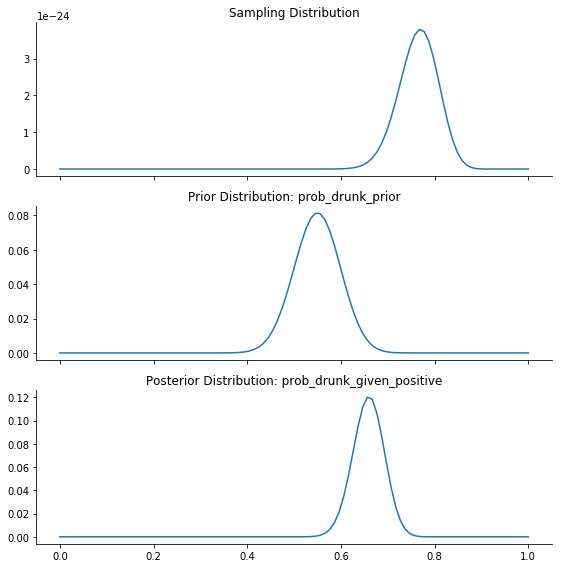

In [4]:
example_post = prob_drunk_given_positive ()


In [5]:
 # Loading the data
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
    

--2019-10-11 18:30:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-11 18:30:00 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [6]:
# Adding a header row and cleaning the data
df = pd.read_csv('house-votes-84.data',
               header=None,
               names=['class_name','handicapped_infants','water_project',
                        'budget_resolution','physician_fee_freeze', 'el_salvador_aid',
                        'religious_groups_in_schools','anti_satellite_test_ban',
                        'aid_to_nicaraguan_contras','mx_missile','immigration',
                        'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue','crime','duty_free_exports',
                        'export_administration_act_south_africa'])
df = df.replace({'?':float(0),'n':float(0),'y':float(1)})
df.sample(10)


,class_name,handicapped_infants,water_project,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
332,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
276,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
353,republican,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
296,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
402,republican,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
247,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
327,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
13,democrat,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
37,republican,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
421,democrat,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [7]:
df.describe()


,handicapped_infants,water_project,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# The samples
df_democrat = df[df['class_name'] == 'democrat']
df_republican = df[df['class_name'] == 'republican']


In [9]:
df_democrat.shape


(267, 17)

In [10]:
df_republican.shape


(168, 17)

In [0]:
issues =['handicapped_infants','water_project',
                        'budget_resolution','physician_fee_freeze', 'el_salvador_aid',
                        'religious_groups_in_schools','anti_satellite_test_ban',
                        'aid_to_nicaraguan_contras','mx_missile','immigration',
                        'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue','crime','duty_free_exports',
                        'export_administration_act_south_africa']


In [0]:
# 2 Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week
from scipy import stats # Estimation of mean, variance and standard deviation with 95% confidence intervals for those estimates.


In [13]:
# Democrats
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(stats.bayes_mvs(df_democrat[issue]))
    


handicapped_infants
(Mean(statistic=0.5842696629213483, minmax=(0.5343910772661137, 0.6341482485765829)), Variance(statistic=0.24565883554647602, minmax=(0.212607048390764, 0.28291854268118294)), Std_dev(statistic=0.4951706918050381, minmax=(0.4610933185275667, 0.5319008767441382)))

water_project
(Mean(statistic=0.449438202247191, minmax=(0.3990951396569604, 0.4997812648374216)), Variance(statistic=0.25025536261491316, minmax=(0.216585142851298, 0.28821223682698466)), Std_dev(statistic=0.49978179619398716, minmax=(0.4653870892615072, 0.5368540181715926)))

budget_resolution
(Mean(statistic=0.8651685393258427, minmax=(0.8306026621838222, 0.8997344164678632)), Variance(statistic=0.11797752808988764, minmax=(0.10210442448704049, 0.13587148307557848)), Std_dev(statistic=0.34315346099766475, minmax=(0.31953782950855836, 0.3686074918874798)))

physician_fee_freeze
(Mean(statistic=0.052434456928838954, minmax=(0.029875728290617666, 0.07499318556706024)), Variance(statistic=0.050249687890137

In [14]:
# Republicans
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(stats.bayes_mvs(df_republican[issue]))
    


handicapped_infants
(Mean(statistic=0.18452380952380953, minmax=(0.1348740937591664, 0.23417352528845264)), Variance(statistic=0.15321067821067821, minmax=(0.12757622532445206, 0.18302964448976053)), Std_dev(statistic=0.39082874638177345, minmax=(0.3571781422826039, 0.4278196401402821)))

water_project
(Mean(statistic=0.44642857142857145, minmax=(0.38280064912809625, 0.5100564937290466)), Variance(statistic=0.2516233766233766, minmax=(0.2095229977956329, 0.3005961314612855)), Std_dev(statistic=0.500861298490665, minmax=(0.45773682154228423, 0.5482664785132185)))

budget_resolution
(Mean(statistic=0.13095238095238096, minmax=(0.08777429322337751, 0.17413046868138438)), Variance(statistic=0.11587301587301588, minmax=(0.09648571597413233, 0.13842505724066656)), Std_dev(statistic=0.3398858913570246, minmax=(0.31062149953622387, 0.3720551803706898)))

physician_fee_freeze
(Mean(statistic=0.9702380952380952, minmax=(0.9484883366699486, 0.9919878538062419)), Variance(statistic=0.029401154401

### 4. In your own words, summarize the difference between Bayesian and Frequentist statistics

## In Bayesian inference:

Bayesian inference derives the posterior probability as a consequence of two antecedents: a prior probability and a "likelihood function" derived from a statistical model for the observed data. Bayesian inference computes the posterior probability according to Bayes' theorem.

the parameters are considered random variable and are estimated, the observed data is considered fixed.

credible intervals incorporate problem-specific contextual information from the prior distribution whereas confidence intervals are based only on the data

## In frequentist inference:

does not require a prior.

the parameters are often treated as having fixed but unknown values.

A frequentist 95% confidence interval means that with a large number of repeated samples, 95% of such calculated confidence intervals would include the true value of the parameter. In frequentist terms, the parameter is fixed (cannot be considered to have a distribution of possible values) and the confidence interval is random (as it depends on the random sample).

## Summarizing:

Bayesian inference: depends on the prior and likelihood of observed data, sample are considered fixed, parameters are considered random variable and are estimated.

In frequentist inference: does not require a prior, parameters are fixed and unknown, the sample are considered random.

In [0]:
# Stretch goals:

In [0]:
# Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective

def bayesian_credibility_region(data, frac=0.95):
    
    data = np.asarray(data)
    theta2 = data.min() 
    theta1 = theta2 + np.log(1. - frac) / float(data.size)
    return theta1, theta2
  

In [16]:
# Democrats
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(bayesian_credibility_region(df_democrat[issue],0.95))
    


handicapped_infants
(-0.011219971061999963, 0.0)

water_project
(-0.011219971061999963, 0.0)

budget_resolution
(-0.011219971061999963, 0.0)

physician_fee_freeze
(-0.011219971061999963, 0.0)

el_salvador_aid
(-0.011219971061999963, 0.0)

religious_groups_in_schools
(-0.011219971061999963, 0.0)

anti_satellite_test_ban
(-0.011219971061999963, 0.0)

aid_to_nicaraguan_contras
(-0.011219971061999963, 0.0)

mx_missile
(-0.011219971061999963, 0.0)

immigration
(-0.011219971061999963, 0.0)

synfuels_corporation_cutback
(-0.011219971061999963, 0.0)

education_spending
(-0.011219971061999963, 0.0)

superfund_right_to_sue
(-0.011219971061999963, 0.0)

crime
(-0.011219971061999963, 0.0)

duty_free_exports
(-0.011219971061999963, 0.0)

export_administration_act_south_africa
(-0.011219971061999963, 0.0)


In [17]:
# Republicans
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(bayesian_credibility_region(df_republican[issue],0.95))
    


handicapped_infants
(-0.017831739723535654, 0.0)

water_project
(-0.017831739723535654, 0.0)

budget_resolution
(-0.017831739723535654, 0.0)

physician_fee_freeze
(-0.017831739723535654, 0.0)

el_salvador_aid
(-0.017831739723535654, 0.0)

religious_groups_in_schools
(-0.017831739723535654, 0.0)

anti_satellite_test_ban
(-0.017831739723535654, 0.0)

aid_to_nicaraguan_contras
(-0.017831739723535654, 0.0)

mx_missile
(-0.017831739723535654, 0.0)

immigration
(-0.017831739723535654, 0.0)

synfuels_corporation_cutback
(-0.017831739723535654, 0.0)

education_spending
(-0.017831739723535654, 0.0)

superfund_right_to_sue
(-0.017831739723535654, 0.0)

crime
(-0.017831739723535654, 0.0)

duty_free_exports
(-0.017831739723535654, 0.0)

export_administration_act_south_africa
(-0.017831739723535654, 0.0)


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)